# Simulating the Landu-Lifshitz-Gerbert Equation using Physics-Informed Neural Networks

In [1]:
#import all necessary modules
from pinns_train import train_MLFFNN, train_LSTM
from pinns_generate_data import generate_data_MLFFNN, generate_data_LSTM
from utils import plot_MLFFNN, plot_LSTM, linear_interaction_matrix
import numpy as np

### Simulating a Single Spin

We use a MLFFNN for solving the LLG eqaution fora single particle

In [2]:
#define constants for the LLG equation
H = (0, 0, -1)  # External magnetic Field Vector
gamma = -1.760  # Gyromagnetic ratio (*10^11 for physical value)
alpha = 0.10    # damping parameter

p = (H, gamma, alpha)

#define time domain for simulation
domain = [0.,35.]

#Initial spin condition (1 degree away from the z-axis)
m0 = [0, np.sin((1 / 180) * np.pi), np.cos((1 / 180) * np.pi)]

Training the NN

In [3]:
# Generate Training data from numerical ODE solver

num_points = 1000   # No. of points for the ODE solver and solution
num_train = 20  # Number of training points (Note that the model is learning the solution for 1000 points with 20 points as training data)
num_iter = 2000 # Number of training epochs
num_coll = 200  # Number of collocation points for the Physics-Informed loss function

training_data = generate_data_MLFFNN(p, domain, m0, num_train=num_train, num_points=num_points)
train_m, train_t = training_data

Train the model

In [7]:
model, loss_list = train_MLFFNN(training_data, p, domain, num_iter=num_iter, num_coll=num_coll)



The number of layers in the model: 10

The number of learnable parameters in the model: 2211
epoch: 0, loss: 1.544295
epoch: 500, loss: 0.065531
epoch: 1000, loss: 0.014496
epoch: 1500, loss: 0.009731


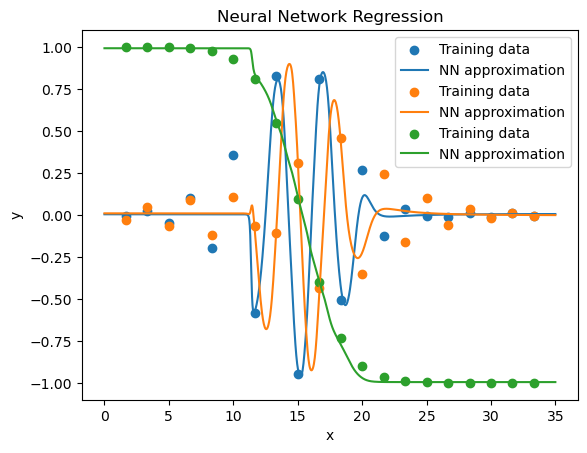

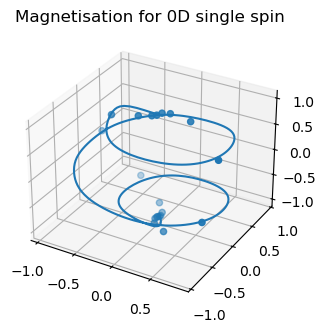

In [9]:
plot_MLFFNN(model, train_t, train_m, domain)

### Simulating Multiple Interacting Spins

Generate Data

In [7]:
#define number of spins
dim = 3

#define constants for the LLG equation

alpha = 0.05    # Damping parameter
h = (0, 0, -1)  #External Magnetic Field
J = 0.3 # Strength of interaction among neighbours

mat = linear_interaction_matrix(dim)    # defines the interaction between the spins

p = (h, gamma, alpha, J, mat)   # LLG params
lookback = 3    # Context window for LSTM
train_test_ratio = 0.5
domain = [0., 65.]  # time period for simulation
num_points = 1000   #number of points for ODE solver

train_test_data = generate_data_LSTM(p, domain, dim, train_test_ratio, num_points, lookback)

Train the LSTM model

In [8]:
n_epochs = 200
lstm_model, lstm_loss_list = train_LSTM(train_test_data, p, domain, n_epochs, dim=dim, num_points=num_points)

Epoch 0: train RMSE 0.4686, test RMSE 0.4072,loss 44.1779
Epoch 50: train RMSE 0.1001, test RMSE 0.0244,loss 0.8850
Epoch 100: train RMSE 0.0948, test RMSE 0.0134,loss 0.4629
Epoch 150: train RMSE 0.0569, test RMSE 0.0155,loss 0.2907
Epoch 199: train RMSE 0.0569, test RMSE 0.0155,loss 0.2402


Plot the Results

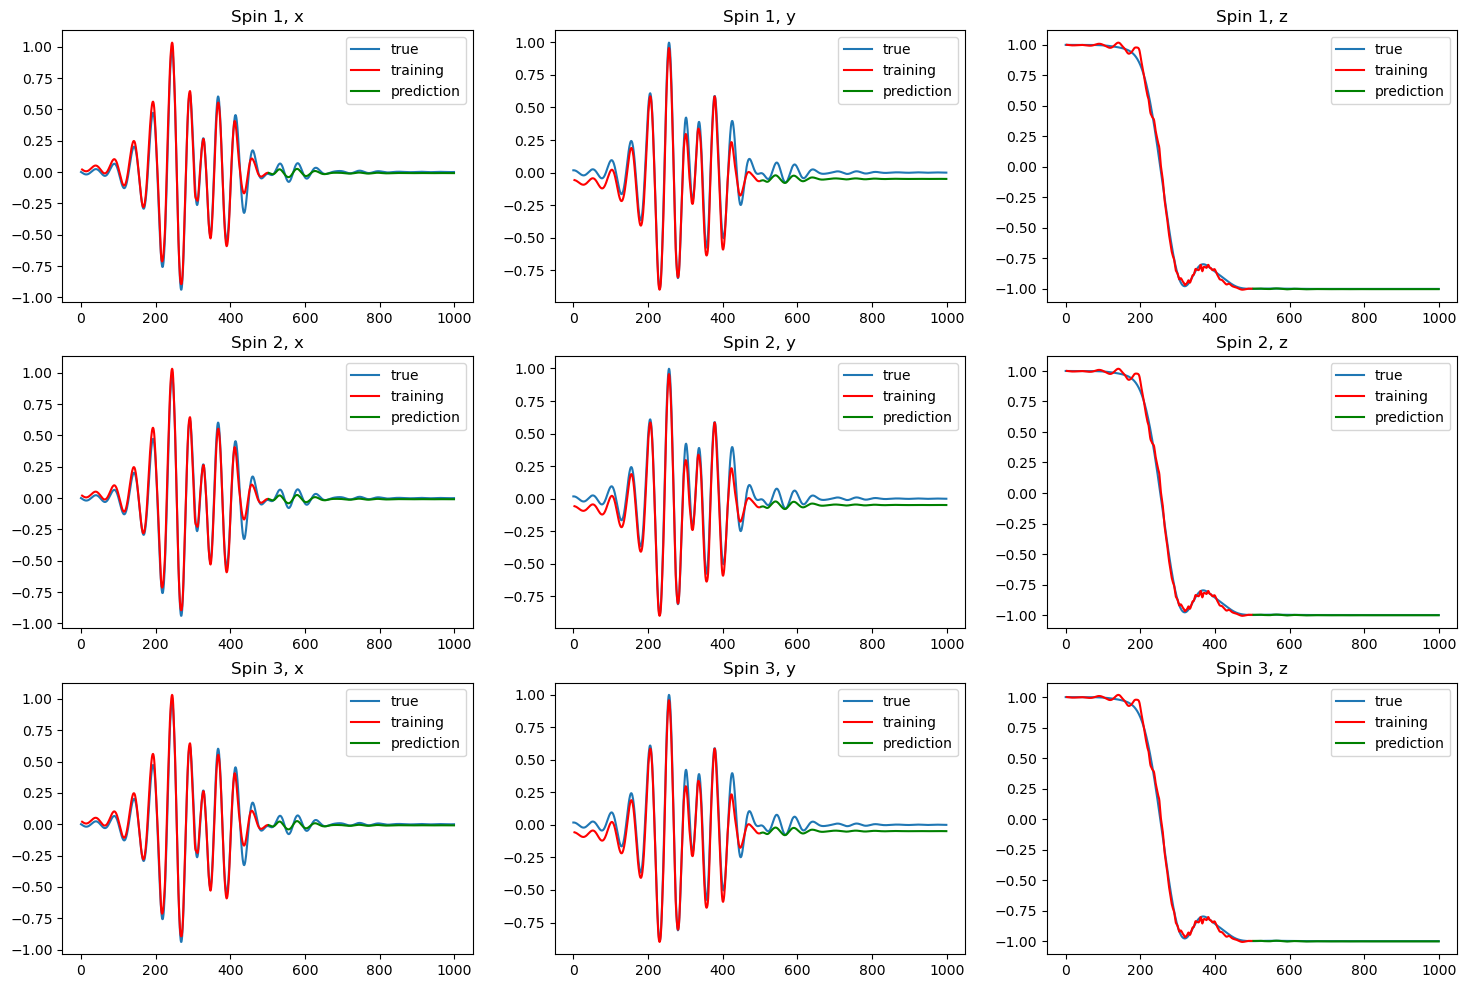

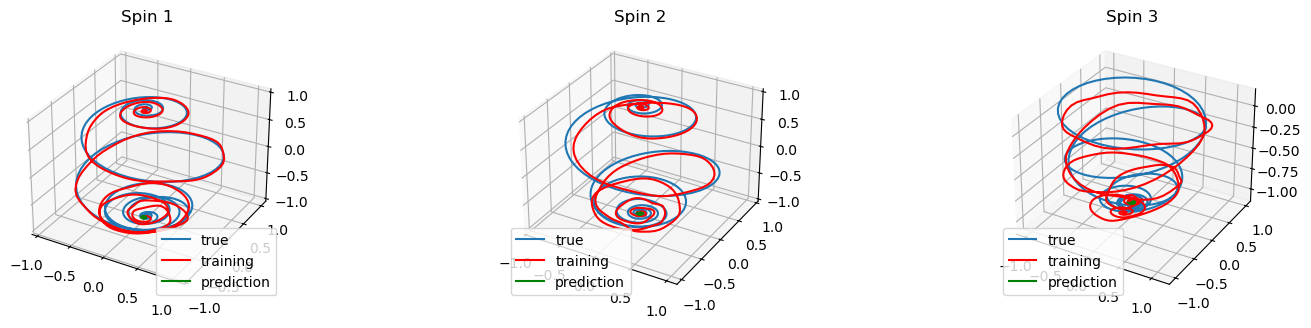

In [9]:
timeseries, X_train, X_test, y_train, y_test = train_test_data
plot_LSTM(lstm_model, timeseries, X_train, X_test, lookback, dim=3)